# Wine Quality Analysis

## I. Introduction:

The goal of this project is to conduct a comprehensive machine learning analysis of the Wine Quality datasets.

Our primary objective is to develop a robust predictive model capable of estimating and classifying the target quality score of wines based solely on their given physicochemical properties (features).

This study will focus on identifying which chemical features are the most critical determinants of perceived quality, thereby providing actionable insight into the factors that drive wine assessment.

## II. Data exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Data Loading ---
print("--- 1. Loading the White Wine Dataset ---")

try:
    df_white = pd.read_csv('data/winequality-white.csv', sep=';')
    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"Error: The file 'data/winequality-white.csv' was not found. Please check the file path.")
    exit()



--- 1. Loading the White Wine Dataset ---
Data successfully loaded.


In [4]:
# --- 2. Structural Overview and Data Quality Check (Phase 1: EDA) ---
print("\n--- 2. Structural Overview and Data Quality Check ---")

print("\n** First 5 Rows (Head) **")
print(df_white.head())

print("\n** Dimensions (Shape) **")
print(f"The dataset contains {df_white.shape[0]} rows (instances) and {df_white.shape[1]} columns (features).")

print("\n** Data Types and Missing Values (Info) **")
df_white.info()



--- 2. Structural Overview and Data Quality Check ---

** First 5 Rows (Head) **
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   a

There are no missing values in this dataset, so we don't need to do a specific data clean before starting analyzing.

In [5]:
# --- 3. Basic Descriptive Analysis ---
print("\n--- 3. Basic Descriptive Analysis (Describe) ---")
# Display the transpose for better readability
print(df_white.describe().T) 




--- 3. Basic Descriptive Analysis (Describe) ---
                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.8779

Quality is therefore a int from 3 to 9 for white wines



--- 4. Target Variable ('quality') Distribution Analysis ---

** Sample Count per Quality Score **
         Sample Count
quality              
3                  20
4                 163
5                1457
6                2198
7                 880
8                 175
9                   5


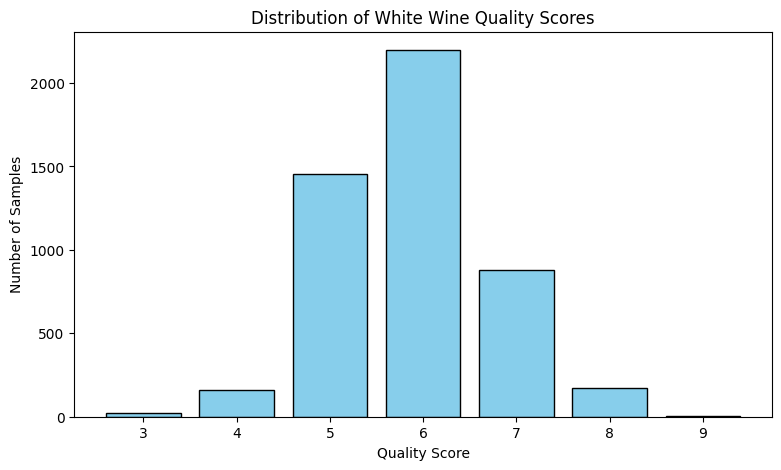

In [6]:
# --- 4. Visualization and Count of the Target Variable ('quality') ---
print("\n--- 4. Target Variable ('quality') Distribution Analysis ---")

# 1. Calculate the exact count for each quality score
quality_counts = df_white['quality'].value_counts().sort_index()

print("\n** Sample Count per Quality Score **")
# Convert the Series to a DataFrame for cleaner table display
quality_table = pd.DataFrame(quality_counts)
quality_table.columns = ['Sample Count']
print(quality_table)

# 2. Visualization (Histogram)
plt.figure(figsize=(9, 5))
plt.hist(df_white['quality'], bins=range(3, 11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of White Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Samples')
plt.show()

In [7]:
# --- 5. Correlation Analysis with the Target ---
print("\n--- 5. Feature Correlation with Quality ---")
# Calculate correlation, sort by relevance to 'quality'
correlation_to_quality = df_white.corr()['quality'].sort_values(ascending=False)
print(correlation_to_quality)


--- 5. Feature Correlation with Quality ---
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


We can observe some features more correlated to quality than others. For instance, we k now that alcohol is gonna be important while citric acid might be impactless.

# III. Feature engineering

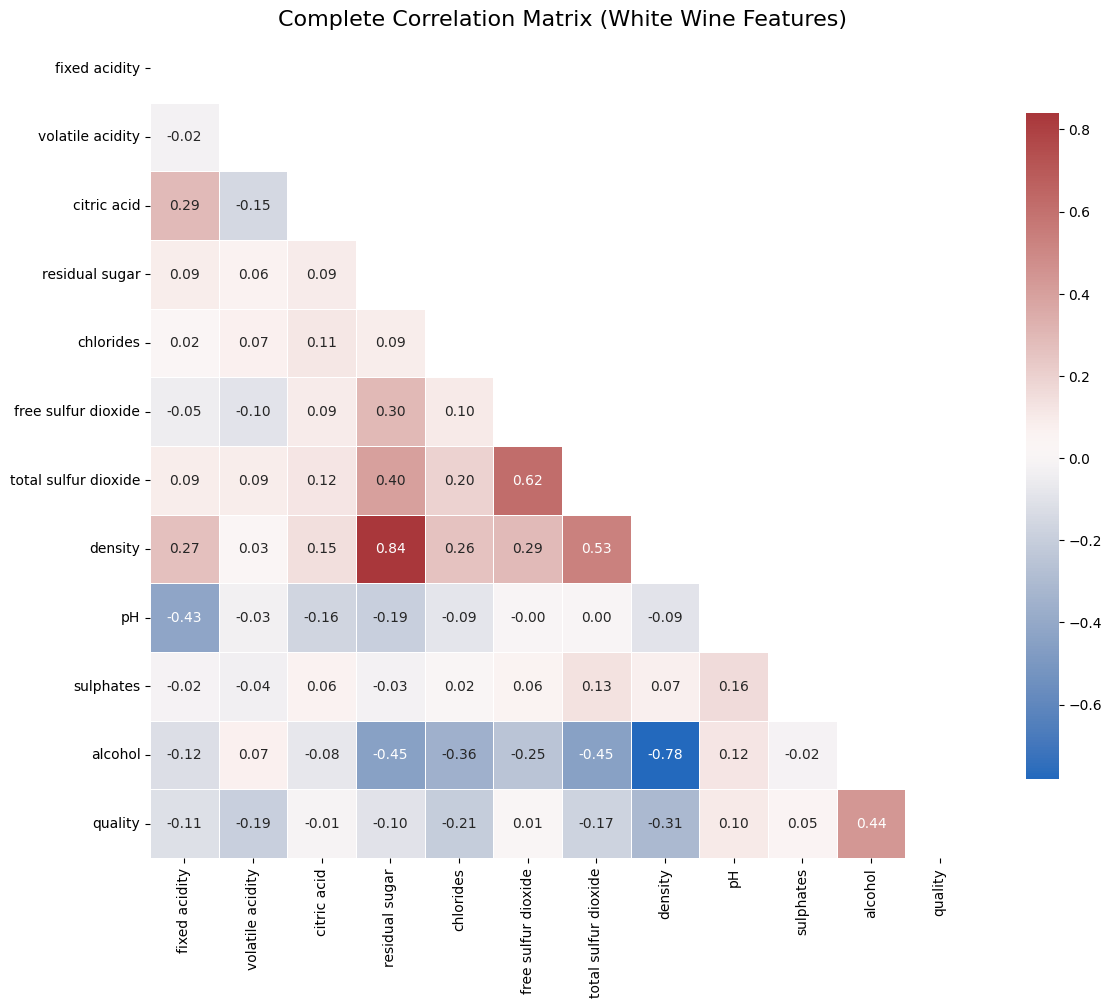

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Calculate the Correlation Matrix
cor_mat = df_white.corr()

# 2. Create a Mask to show only the Upper Triangle
mask = np.triu(cor_mat)

# 3. Plotting the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    cor_mat, 
    mask=mask, 
    annot=True,              # Display correlation values on the plot
    fmt=".2f",               # Format values to two decimal places
    cmap='vlag',             # 'vlag' is a good diverging color palette
    cbar_kws={"shrink": .8}, # Shrink the color bar a bit
    square=True,             # Ensure cells are square
    linewidths=.5,           # Lines between cells
    cbar=True                # Display the color bar
)

plt.title('Complete Correlation Matrix (White Wine Features)', fontsize=16)
plt.tight_layout()
plt.show()


The heatmap of the correlation matrix makes us realize that we are gonna be able to keep a lot of information while reducing the number of features. For instance:

- citric acid and free sulfur dioxide seem impactless to estimate the quality
- density and residual sugar are heavily correlated which means that we may erase one

We can now do a ACP to determine how many features we need to get 90% variance

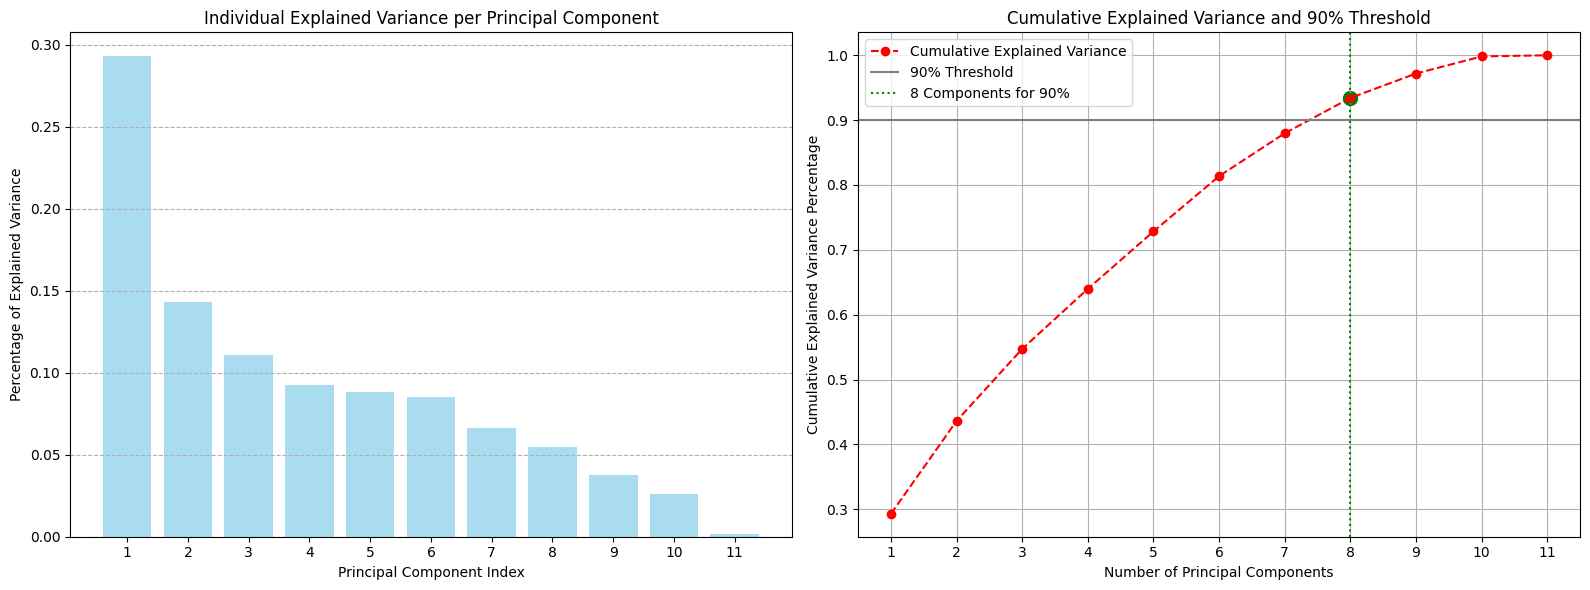


--- PCA Results Summary ---
Total number of features: 11
Number of components needed to explain 90% of the variance: 8
Variance explained by the first 8 components: 0.93


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# --- 1. Data Preparation for PCA ---
# Isolate features (X) and the target (y - not used in PCA but good practice)
X = df_white.drop('quality', axis=1) 
# The target variable is 'quality', we don't want to include it in PCA calculation.
y = df_white['quality']

# 2. Standardization (Crucial step for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Perform Principal Component Analysis (PCA) ---
pca = PCA(n_components=None)
pca.fit(X_scaled)

# --- 3. Analyze Explained Variance ---
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Identify the number of components needed to reach 90%
n_components_90 = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1


# --- 4. Plotting the Variance explained per vector ---
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) # First subplot: Variance per component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue', label='Individual Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Percentage of Explained Variance')
plt.title('Individual Explained Variance per Principal Component')
plt.grid(axis='y', linestyle='--')
plt.xticks(range(1, len(explained_variance_ratio) + 1)) # Ensure integer ticks on x-axis

# --- 5. Plotting the Cumulative Variance Explained ---
plt.subplot(1, 2, 2) # Second subplot: Cumulative Variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red', label='Cumulative Explained Variance')

# Add 90% threshold line
plt.axhline(y=0.90, color='grey', linestyle='-', label='90% Threshold')
# Mark the point where 90% is crossed
plt.axvline(x=n_components_90, color='green', linestyle=':', label=f'{n_components_90} Components for 90%')
plt.scatter(n_components_90, cumulative_explained_variance[n_components_90 - 1], color='green', s=100)


plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Percentage')
plt.title('Cumulative Explained Variance and 90% Threshold')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.tight_layout()
plt.show()

# --- 6. Conclusion ---
print("\n--- PCA Results Summary ---")
print(f"Total number of features: {X.shape[1]}")
print(f"Number of components needed to explain 90% of the variance: {n_components_90}")
print(f"Variance explained by the first {n_components_90} components: {cumulative_explained_variance[n_components_90 - 1]:.2f}")

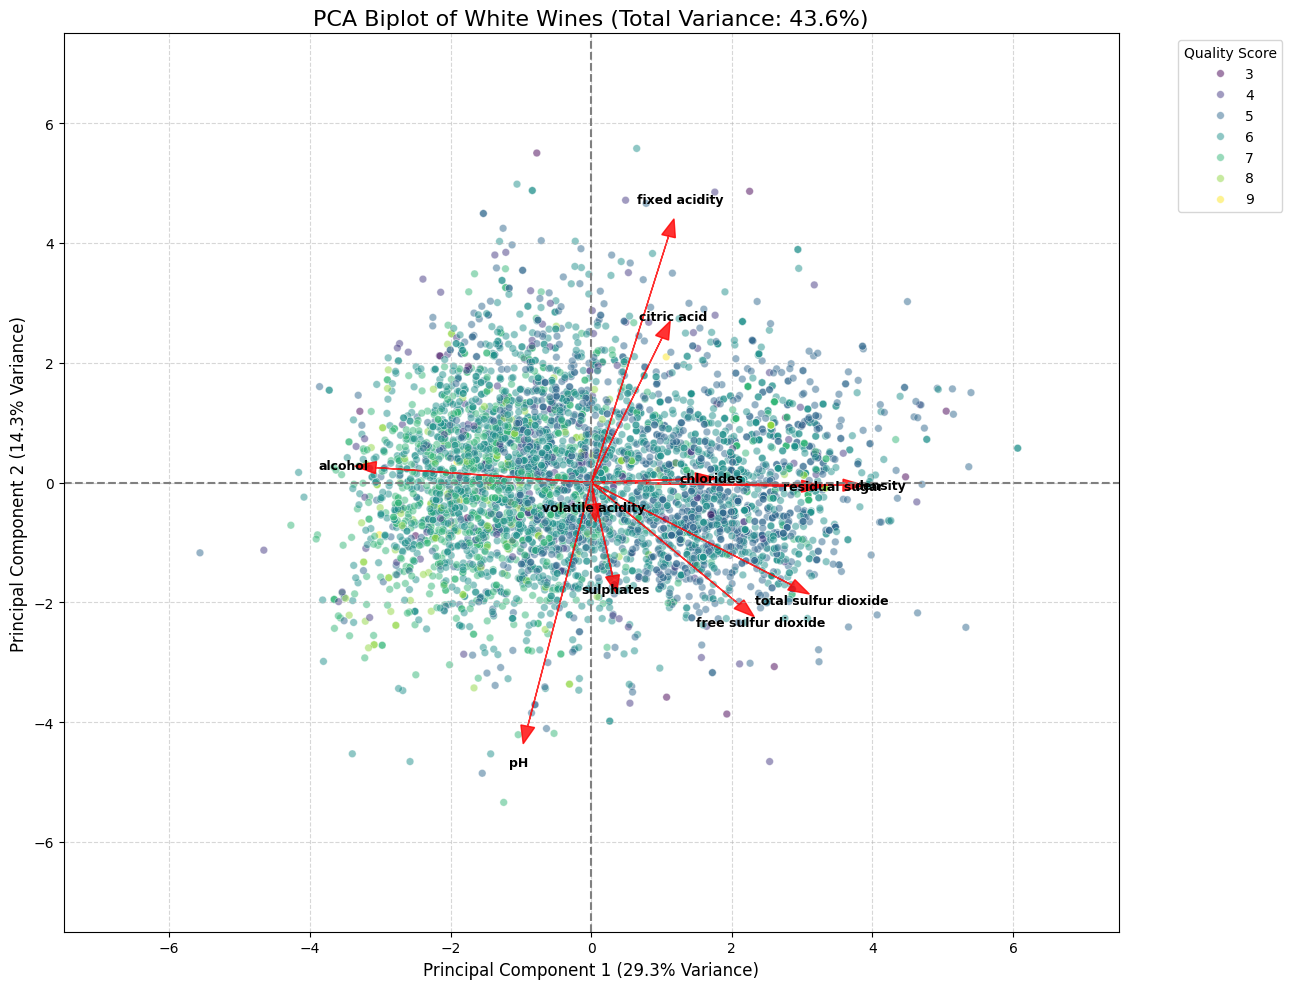

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Re-create the PCA DataFrame (from previous cell) ---
# (We assume 'X_scaled', 'pca', 'y', and 'X' exist)
X_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca[:, 0:2], columns=['PC1', 'PC2'])
pca_df['quality'] = y.values

# --- 2. Get the Feature Loadings (the directions of the arrows) ---
# pca.components_ has shape (n_components, n_features)
# We need the transpose (.T) to get (n_features, n_components)
loadings = pca.components_.T
feature_names = X.columns # Get the original feature names

# --- 3. Set up the Plot (Scatter + Arrows) ---
plt.figure(figsize=(13, 10))
# Plot the scatter plot of wines (the scores)
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='quality', 
    data=pca_df, 
    palette='viridis', 
    alpha=0.5, # Make points lighter so arrows are visible
    s=30,
    legend='full'
)

# --- 4. Add the Arrows (the loadings) ---
# We need a scaling factor to make arrows visible on the same plot
# This is arbitrary; adjust 'scale_factor' as needed
scale_factor = 7 

for i, (feature_name, loading) in enumerate(zip(feature_names, loadings)):
    # Arrow properties
    plt.arrow(
        0, 0, # Start at the origin (0,0)
        loading[0] * scale_factor, # PC1 component (scaled)
        loading[1] * scale_factor, # PC2 component (scaled)
        color='r', 
        head_width=0.2, 
        head_length=0.3, 
        alpha=0.8
    )
    # Arrow label
    plt.text(
        loading[0] * scale_factor * 1.15, # Position the text slightly outside the arrow
        loading[1] * scale_factor * 1.15,
        feature_name, 
        color='black', 
        ha='center', 
        va='center',
        fontsize=9,
        fontweight='bold'
    )

# --- 5. Add informative labels and title ---
variance_pc1 = pca.explained_variance_ratio_[0] * 100
variance_pc2 = pca.explained_variance_ratio_[1] * 100
total_variance_2d = variance_pc1 + variance_pc2

plt.xlabel(f'Principal Component 1 ({variance_pc1:.1f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({variance_pc2:.1f}% Variance)', fontsize=12)
plt.title(f'PCA Biplot of White Wines (Total Variance: {total_variance_2d:.1f}%)', fontsize=16)
plt.legend(title='Quality Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Set axis limits to be symmetrical around 0
max_val = np.max(np.abs(X_pca[:, 0:2])) * 1.1 # Get max range from data points
plt.xlim(-7.5, 7.5)
plt.ylim(-7.5, 7.5)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

We can see once again that alcohol is positively correlated to the quality and density is anticorrelated to the quality

Let's now see if doing a PCA is efficient to estimate the quality of the wine. We are gonna compare RMSE and R^2 using a Random Forest Regressor algorithm for both the PCA model with 8 features and the initial model with the 11 features 

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Define X and y ---
# (Assuming df_white is still in memory)
X = df_white.drop('quality', axis=1)
y = df_white['quality']

# --- 2. The *CRITICAL* Step: Train-Test Split FIRST ---
# We split the data BEFORE any scaling or PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Preprocessing Pipeline ---

# Step A: Scaling
scaler = StandardScaler()
# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the *same* scaler
X_test_scaled = scaler.transform(X_test)

# Step B: PCA (Feature Engineering)
# Initialize PCA with your 8 components
pca = PCA(n_components=8)
# Fit the PCA ONLY on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform the scaled test data using the *same* PCA
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature shape: {X_train.shape}")
print(f"New PCA feature shape: {X_train_pca.shape}")

# --- 4. Phase 3: Learning (Model Training) ---
# We will use a Random Forest Regressor as a strong baseline model.
# 'Regressor' because we estimate a continuous score.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the new 8 PCA features
print("\nTraining the model on 8 PCA components...")
model.fit(X_train_pca, y_train)
print("Training complete.")

# --- 5. Model Evaluation ---
# Predict on the test set (which also has 8 components)
y_pred = model.predict(X_test_pca)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation (on Test Set) ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# --- Quick check: what does the model predict? ---
print("\n** Example Predictions (Actual vs. Predicted) **")
example_df = pd.DataFrame({'Actual Quality': y_test.values, 'Predicted Quality': np.round(y_pred, 1)})
print(example_df.head(10))


# X_train_scaled has 11 features
print(f"\nTraining on features shape: {X_train_scaled.shape}")

# --- 1. Phase 3: Learning (Model Training on 11 Original Features) ---
# Initialize the exact same model configuration for a fair comparison
model_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the 11 *scaled* original features
print("\nTraining the model on all 11 original features...")
model_full.fit(X_train_scaled, y_train)
print("Training complete.")

# --- 2. Model Evaluation ---
# Predict on the test set
y_pred_full = model_full.predict(X_test_scaled)

# Calculate metrics
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
r2_full = r2_score(y_test, y_pred_full)

print("\n--- Model Evaluation (on 11 Original Features) ---")
print(f"Root Mean Squared Error (RMSE): {rmse_full:.4f}")
print(f"R-squared (R²): {r2_full:.4f}")

# --- 3. Verdict ---
print("\n--- VERDICT: PCA vs. FULL FEATURES ---")
print(f"PCA Model (8 features):     RMSE = 0.5978  |  R² = 0.5385")
print(f"Full Model (11 features):   RMSE = {rmse_full:.4f}  |  R² = {r2_full:.4f}")


Original feature shape: (3918, 11)
New PCA feature shape: (3918, 8)

Training the model on 8 PCA components...
Training complete.

--- Model Evaluation (on Test Set) ---
Root Mean Squared Error (RMSE): 0.5978
R-squared (R²): 0.5385

** Example Predictions (Actual vs. Predicted) **
   Actual Quality  Predicted Quality
0               7                6.8
1               8                7.5
2               8                6.4
3               5                5.2
4               7                6.4
5               6                6.1
6               5                5.0
7               4                5.7
8               6                5.9
9               5                5.4

Training on features shape: (3918, 11)

Training the model on all 11 original features...
Training complete.

--- Model Evaluation (on 11 Original Features) ---
Root Mean Squared Error (RMSE): 0.5901
R-squared (R²): 0.5504

--- VERDICT: PCA vs. FULL FEATURES ---
PCA Model (8 features):     RMSE = 0.5978  |  R

We can see that the PCA has almost the same performance as the Full model, while removing 3 features. So it is indeed really efficient